# Link: https://patches12306.github.io/patches12306/


## Garrett Van Beek
## Ben Nguyen
## Intro to Data Science
## Professor Nick Mattei

# Final Tutorial Milestone 1: “Can you Google the stock market?"

For our project we plan to collect data on search traffic from Google and Twitter and see how that data correlates with the performances of certain publicly traded stocks. For example, one question we would like to ask is “how does the search traffic about clean energy sources correlate with the performance of clean energy stocks?”. We would also like to see how the sentiment about certain topics correlates to their stock. For this, we plan to use a python library Twitter Sentiment Analysis or Tweepy. This tool gives us a sentiment rating that we can compare to our stock’s performance. We will most likely analyze our data as line graphs. This way we can see how stock performance, search traffic, and sentiment change over time. Consequently, we hope to find correlations and gain insight on the data.

We hope to tackle topics that are a bit more controversial or nuanced than clean energy. Some of the questions that we have thought of asking are: “How does search traffic on sex scandals within companies correlate to the stocks of the companies?” We can also observe the effects of influencers like Donald Trump or Kanye West have on the stock market. We can observe their twitter comments about certain topics and then observe how stocks relating to these topic’s perform. Another angle we can observe is how the general sentiment on topics will correlate to related stocks. For example, we can ask “How does the sentiment about Elon Musk correlate to the stock performance of TESLA?”

For our information on stock performance we plan on scraping or downloading data from Yahoo Finance, which contains a barrage of data on publicly traded stocks. Links to the datasets, tools, and websites we plan to use are provided below.

https://trends.google.com/trends/?geo=US https://www.tweepy.org/ https://github.com/shaypal5/awesome-twitter-data https://finance.yahoo.com/

tutorial project for datascience

# Final Tutorial Milestone 2

## Questions
Our overall goal is to determine "Can we google the stock market?" By this we mean "can we find correlations between google search trends/twitter activity on certain topics and the performance of stocks related to those topics?"

This is a very general questions so we will answer two specific questions based on our search history. 

### 1. How does Elon Musk's Twitter activity correlate to the stock performance of Tesla. How do search trends on Elon Musk correlate to the performance of Tesla Stock?
Note: we are currently waiting for authorization to use Twitter's Tweepy API. Until then, we will be using google trend data from Google Trends.

#### Step One: Get the Data
We download google search data as CSVs. Our goal is to create a DataFrame where every day is a row, and the columns are:
1. Search trends of Elon Musk
2. Performance of TESLA Stock
3. Performance of PAYPAL Stock

Our timeframe for these questions will be 2016-2018

In [1]:
#Import Statements
import pandas as pd
import re
import datetime
# from datetime import timedelta

In [71]:
#Read csv into dataframe
tesla_df = pd.read_csv('./data/tesla2016-2018.csv')
paypal_df = pd.read_csv('./data/paypal2016-2018.csv')
elon_df = pd.read_csv('./data/elon2016-2018.csv')
import statsmodels.api as sm
import seaborn as sns

#Turn date strings into datetime objects.
dateTimeList = []
for d in elon_df['Week']:
    date = re.split('/', d)
    dateObject = datetime.datetime(
        int(date[2]),
        int(date[0]),
        int(date[1]))
    # Increase the day by one so that it lines up with the date in the other data frames.
    dateTimeList.append(dateObject + datetime.timedelta(days=1))
elon_df['Date_time'] = dateTimeList

stringArray = []
for d in elon_df['Date_time']:
    date_as_string = d.isoformat()
    stringArray.append(date_as_string[0:10])
elon_df['Date'] = stringArray

# Merge the three data frames
joined_df = pd.merge(tesla_df, paypal_df, on="Date", how="inner", suffixes=('_t','_p'))
complete_df = pd.merge(joined_df, elon_df, on="Date", how="left")

# filter the data so the only columns are date, closing price of tesla and paypal
slim_df = complete_df[["Date", "Close_t", "Close_p", "elon musk: (United States)"]]
slim_df
complete_df
drop_df = complete_df.drop(columns=['Open_t', 'High_t','Low_t','Adj Close_t','Open_p','High_p','Low_p','Adj Close_p'])
# TODO: Rename the columns
drop_df = drop_df.rename(columns={"Close_t": "Tesla_price", "Volume_t": "Tesla_volume", "Close_p":"Paypal_price", 
                        "Volume_p":"Paypal_volume"})

#drops unecessary columns to show correlatotio between elon musk, tesla price, and paypal price
correl = drop_df.drop(columns =['Tesla_volume','Date','Paypal_volume','Week','Date_time',])
correl.corr()


,Tesla_price,Paypal_price,elon musk: (United States)
Tesla_price,1.000000,0.730257,0.336975
Paypal_price,0.730257,1.000000,0.582043
elon musk: (United States),0.336975,0.582043,1.000000


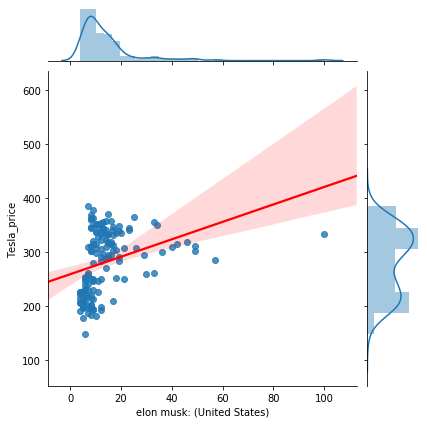

In [55]:
sns.jointplot(y='Tesla_price', x='elon musk: (United States)', data=drop_df, kind='reg', joint_kws={'line_kws':{'color':'red'}})

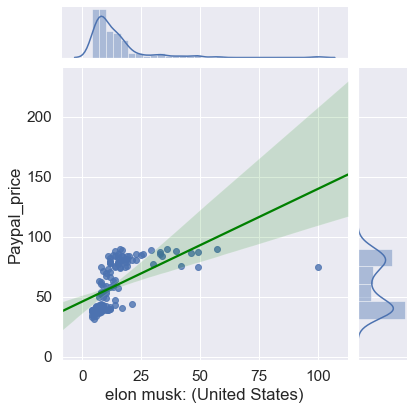

In [73]:
sns.jointplot(y='Paypal_price', x='elon musk: (United States)', data=drop_df, kind='reg', joint_kws={'line_kws':{'color':'green'}})